# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Importing libraries

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Statistics Libraries
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import expon




# Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load Dataset
df=pd.read_csv('Superstore Marketing Data.csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
# Checking duplicate values
df.duplicated().sum()


# No duplicate values

0

### Handling NaNs & addressing any inconsistencies.

1. Filled Income Nans with Median Income
2. Changed dtype of Dt_Customer to datetime

In [ ]:
# Checking null values
df.isna().sum()

# 24 null values in 'Income' col

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:

# Calculate the median income
median_income = df['Income'].median()

df['Income']=df['Income'].fillna(median_income)

In [ ]:
# Converting 'Dt_Customer' to datetime dtype

df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%m/%d/%Y',errors='coerce')
df['Dt_Customer']

#If %y (lowercase) used, it would expect a two-digit year, and '2022' would be interpreted as '22'.



0      2014-06-16
1      2014-06-15
2      2014-05-13
3             NaT
4             NaT
          ...    
2235          NaT
2236   2013-01-22
2237          NaT
2238   2012-11-29
2239          NaT
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [ ]:
df.info()

# ' Dt_Customer' has 916 null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          1324 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

  ### Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
# Creating empty Dict
stats_df={'col':[],'mean':[],'median':[],'std':[],'variance':[],'mode':[]}

# Selecting num_features
num_features=list(set(df.columns)-set(['Id','Education', 'Marital_Status','Dt_Customer','Response', 'Complain']))

for col in num_features :
    mean=df[col].mean()
    med=df[col].median()
    std=df[col].std()
    var=(df[col].std())**2
    mode=df[col].mode()[0]
    stats_df['col'].append(col)
    stats_df['mean'].append(mean)
    stats_df['median'].append(med)
    stats_df['std'].append(std)
    stats_df['variance'].append(var)
    stats_df['mode'].append(mode)

# Converting to DF
pd.DataFrame(stats_df)


,col,mean,median,std,variance,mode
0,NumDealsPurchases,2.325000,2.0,1.932238,3.733542e+00,1.0
1,NumWebVisitsMonth,5.316518,6.0,2.426645,5.888606e+00,7.0
2,MntSweetProducts,27.062946,8.0,41.280498,1.704080e+03,0.0
3,Kidhome,0.444196,0.0,0.538398,2.898725e-01,0.0
4,MntGoldProds,44.021875,24.0,52.167439,2.721442e+03,1.0
5,NumCatalogPurchases,2.662054,2.0,2.923101,8.544517e+00,0.0
6,NumWebPurchases,4.084821,4.0,2.778714,7.721252e+00,2.0
7,Recency,49.109375,49.0,28.962453,8.388237e+02,56.0
8,Income,52237.975446,51381.5,25037.955891,6.268992e+08,51381.5
9,Year_Birth,1968.805804,1970.0,11.984069,1.436179e+02,1976.0


In [ ]:
# 2nd Method using describe
stats_df_shortcut=df.describe().T
stats_df_shortcut

# Presenting statistics such as mean, median, variance, and standard deviation for numerical variable
stats_df_shortcut.drop(['Id','Response','Complain'],axis=0,inplace=True)

# Calculating Variance
stats_df_shortcut['Variance']=stats_df_shortcut['std']**2
stats_df_shortcut


,count,mean,std,min,25%,50%,75%,max,Variance
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0,1.436179e+02
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0,6.268992e+08
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0,2.898725e-01
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0,2.965219e-01
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,8.388237e+02
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,1.132978e+05
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,1.581926e+03
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,5.094743e+04
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,2.984325e+03
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0,1.704080e+03


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

### Outlier Treatment

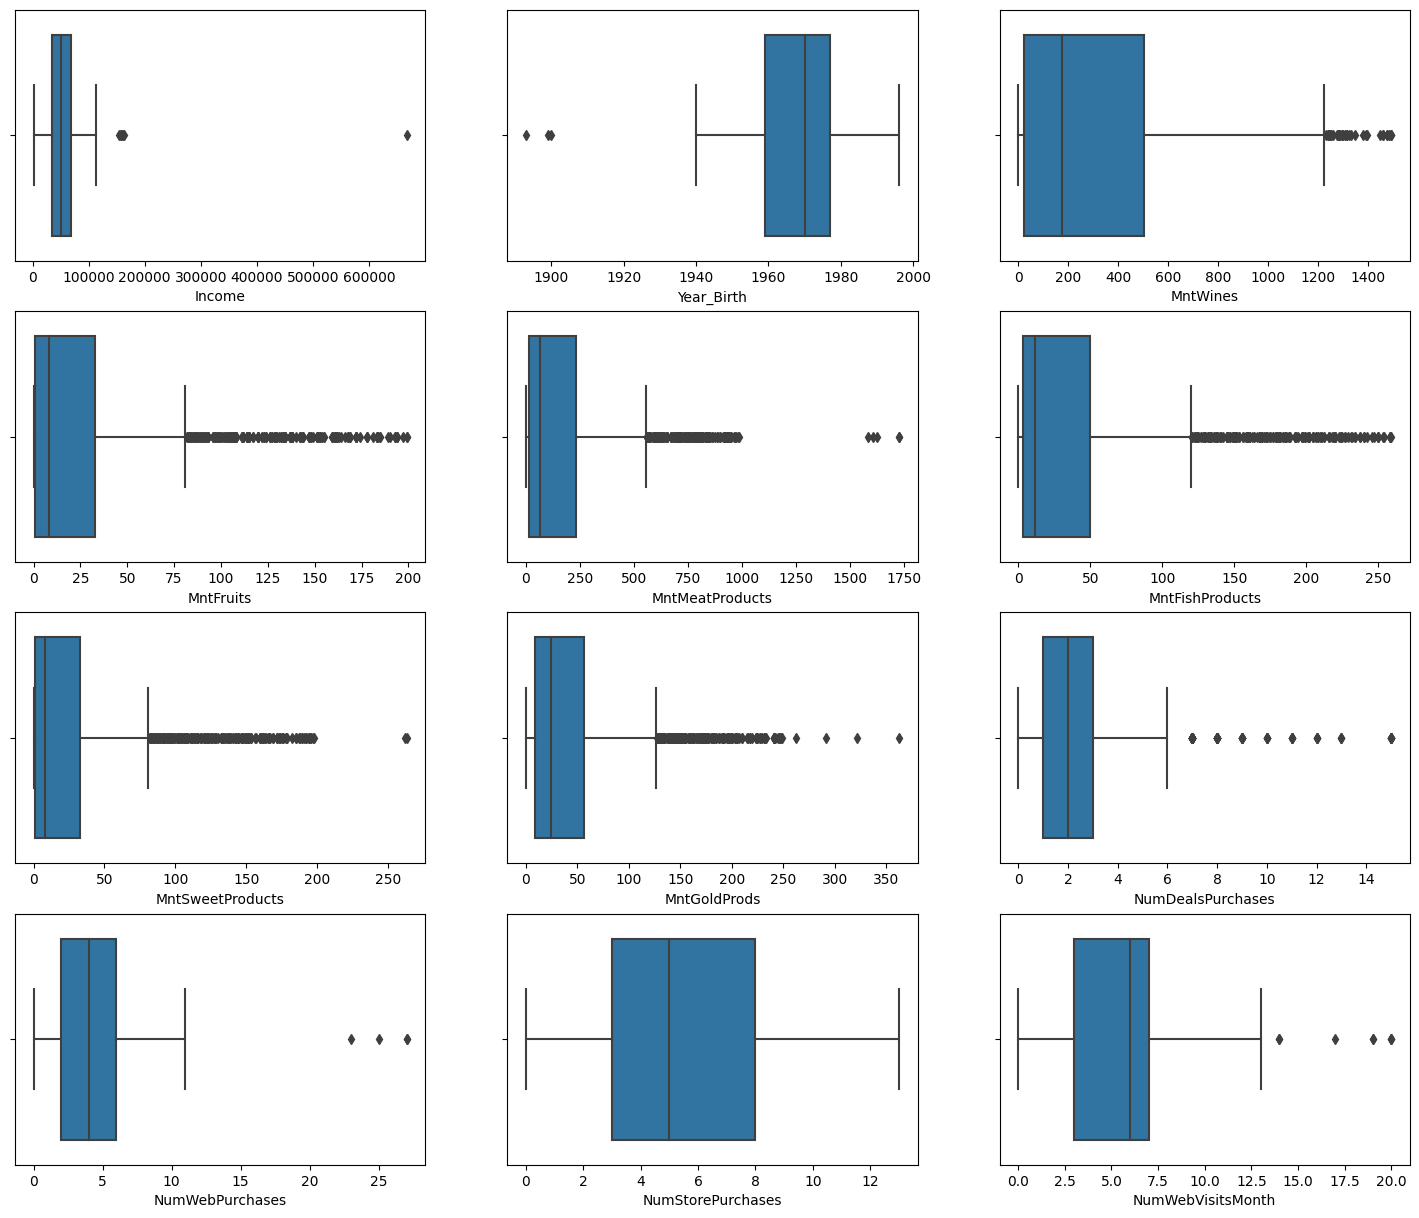

In [ ]:
possible_outliers=['Income','Year_Birth','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


plt.figure(figsize=(18,15))
for i,col in enumerate(possible_outliers):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=col)

In [ ]:
# Outliers treatment
df[df['Year_Birth']<=1920]

# Person born in 1893 & becoming customer in 2014 is highly unlikely
# as it implies his age =2014-1893=121 years


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [ ]:
df=df[df['Year_Birth']>=1920]


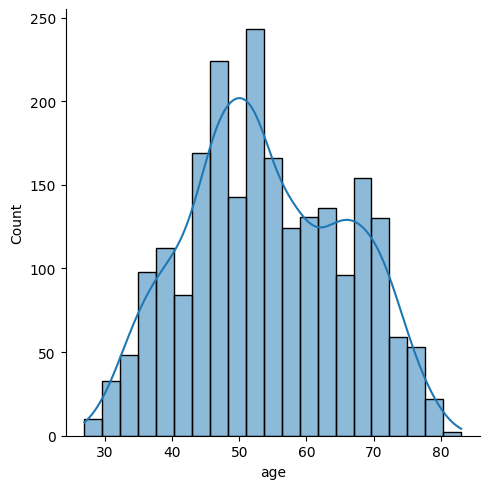

In [ ]:
# Making age col

current_year=2023
df['age']=current_year-df['Year_Birth']
sns.displot(df['age'],kde=True)


In [ ]:
# Handling 'Income' Outliers

q1=df['Income'].quantile(0.25)
q3=df['Income'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr

df=df[df['Income']<=ub]

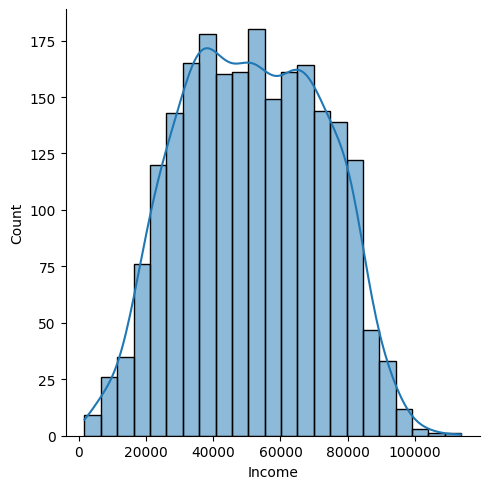

In [ ]:
sns.displot(df['Income'],kde=True)


#### Education & 'Marital_Status' countplots

Text(0.5, 1.0, 'Education Countplot')

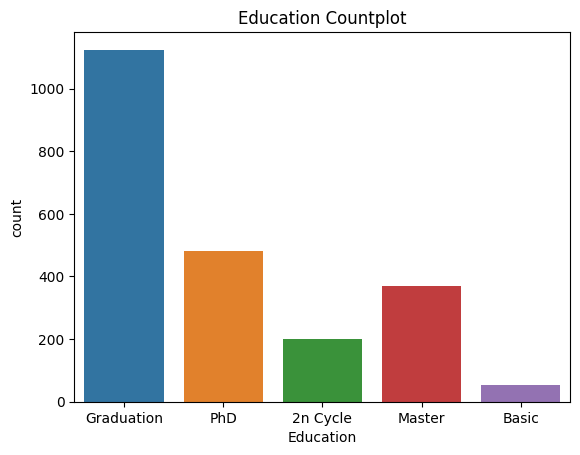

In [ ]:
sns.countplot(data=df,x='Education')
plt.title('Education Countplot')

Text(0.5, 1.0, 'Marital_Status')

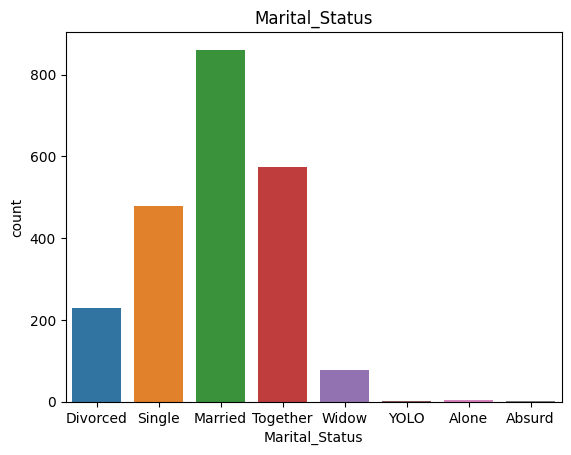

In [ ]:
sns.countplot(data=df,x='Marital_Status')
plt.title('Marital_Status')


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

In [ ]:
'''
 1. NumWebVisitsMonth - number of visits to company's website in the last month will follow
Poisson Distri

2. ['Income','age'] are expected to follow normal distribution

3. Response has Binomial Distri

4. Recency - number of days since the last purchase
'''

"\n 1. NumWebVisitsMonth - number of visits to company's website in the last month will follow\nPoisson Distri\n\n2. ['Income','age'] are expected to follow normal distribution\n\n3. Response has Binomial Distri\n\n4. Recency - number of days since the last purchase\n"

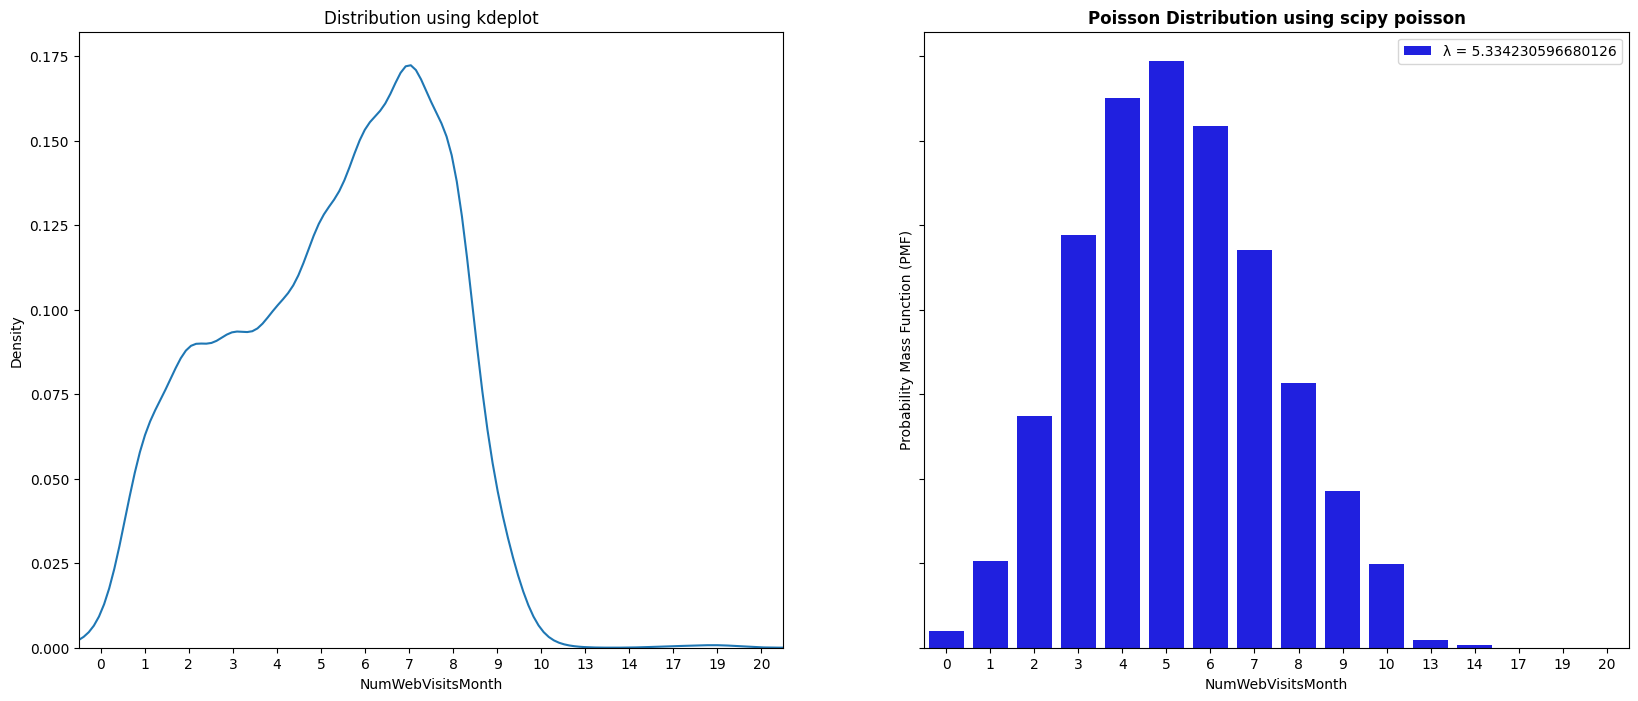

In [ ]:
from scipy.stats import poisson

# Calculating lambda
lambda_visits=df['NumWebVisitsMonth'].mean()

# For subplotting
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

# Distribution using kdeplot
sns.kdeplot(df['NumWebVisitsMonth'], ax=axes[0]).set_title('Distribution using kdeplot')

# Though Poisson is Discrete Prob Distri ,kdeplot plots the curve by smoothening
# Calculate the PMF for each df['NumWebVisitsMonth'] value using the Poisson distribution
poisson_pmf_visits = poisson.pmf(df['NumWebVisitsMonth'], lambda_visits)

# Plot Poisson Distribution
sns.barplot(x=df['NumWebVisitsMonth'],y= poisson_pmf_visits, color='blue',
            label=f'λ = {lambda_visits}', ax=axes[1])
axes[1].set_ylabel('Probability Mass Function (PMF)')
axes[1].set_title('Poisson Distribution using scipy poisson', weight='bold')
axes[1].legend()

# Equalize the aspect ratio of both plots
axes[0].set_aspect('auto')
axes[1].set_aspect('auto')

plt.show()


Normal Distribution of ['Income','age']

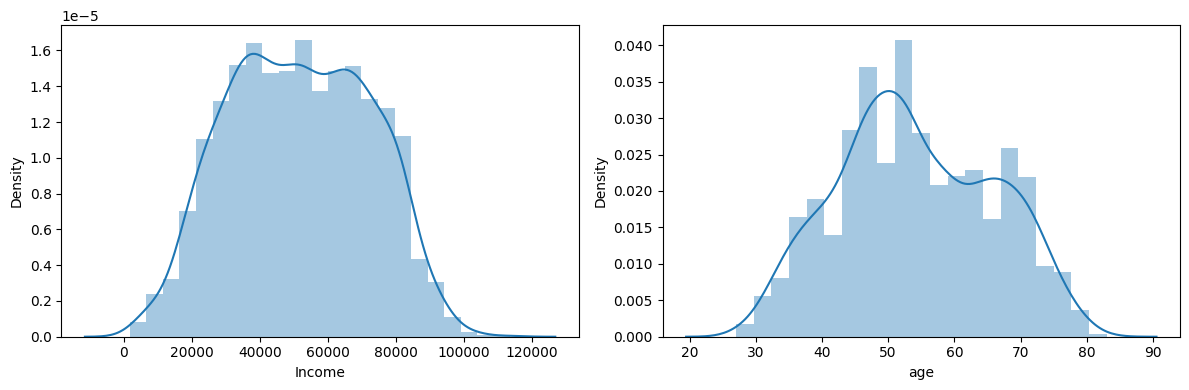

In [ ]:

norm_distri=['Income','age']
plt.figure(figsize=(12,4))

for i,col in enumerate(norm_distri):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])
    plt.tight_layout()

plt.show()

In [ ]:
print("E(X) of Income =",df['Income'].mean())
print("E(X) of age =",df['age'].mean())


E(X) of Income = 51619.5042620009
E(X) of age = 54.11126065500224


In [ ]:
# Binomial Distri


import scipy.stats as stats

# Calculate the number of trials (count of data points)
n_trials = len(df['Response'])

# Calculate the probability of success (e.g., acceptance rate)
p_success = df['Response'].mean()

# Calculate the probability of a specific number of successes (e.g., number of customers who accepted the offer)

specific_success_count = 25  #Value can be entered by the user
# specific_success_count = int(input('Enter number of successes you want:'))

probability_specific_success = stats.binom.pmf(specific_success_count, n_trials, p_success)

# Calculate the expected number of successes
expected_success_count = n_trials * p_success

print("Number of Trials (n):", n_trials)
print("Probability of Success (p):", p_success)
print(f"Probability of {specific_success_count} Successes:", probability_specific_success)
print("Expected Number of Successes:", expected_success_count)


Number of Trials (n): 2229
Probability of Success (p): 0.14984297891431134
Probability of 25 Successes: 2.887131525197431e-118
Expected Number of Successes: 333.99999999999994


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
# Dropping columns


# id is of no use
# 'Year_Birth' dropped coz age calculated
# 'Dt_Customer' has too many null values
df.drop(['Id','Year_Birth','Dt_Customer'],axis=1,inplace=True)

In [ ]:
# Summation of monthly spends
df['Total_Mnt_Spend']=np.sum(df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', \
                              'MntSweetProducts','MntGoldProds']],axis=1)

 Clustering based on age & Income


<Axes: xlabel='age', ylabel='Total_Mnt_Spend'>

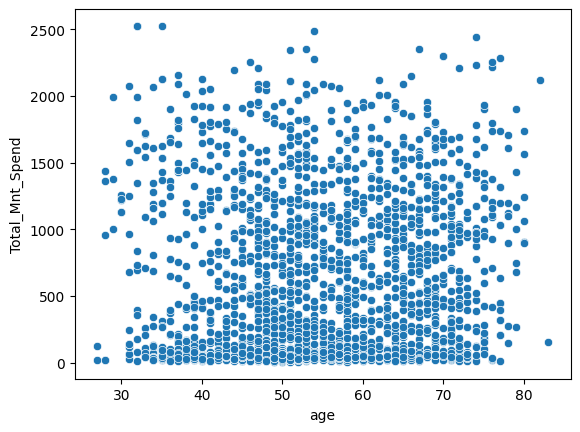

In [ ]:
sns.scatterplot(data=df,x="age",y="Total_Mnt_Spend")


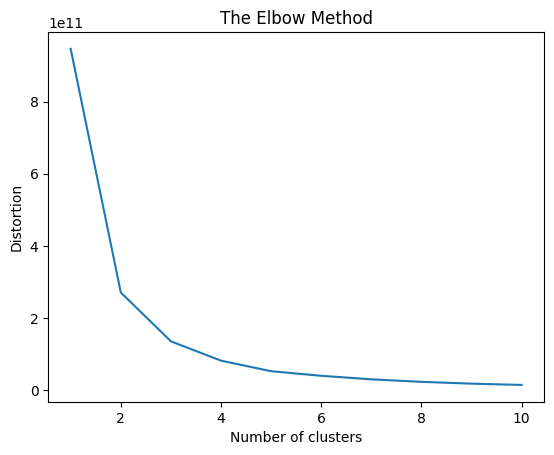

In [ ]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (e.g. income,age )
X = df[["age","Income"]]


# Loop to select n_clusters
wcss = []
for i in range(1, 11):
    km1 = KMeans(n_clusters = i, init = 'k-means++',random_state = 4)
    km1.fit(X)
    wcss.append(km1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# at n=3 wcss starts to decrese more slowly


In [ ]:
# From Elbow Method ,number of clusters
n_clusters = 3

# Perform K-Means clustering
km1 = KMeans(n_clusters=n_clusters, random_state=4)
df["Cluster"] = km1.fit_predict(X)

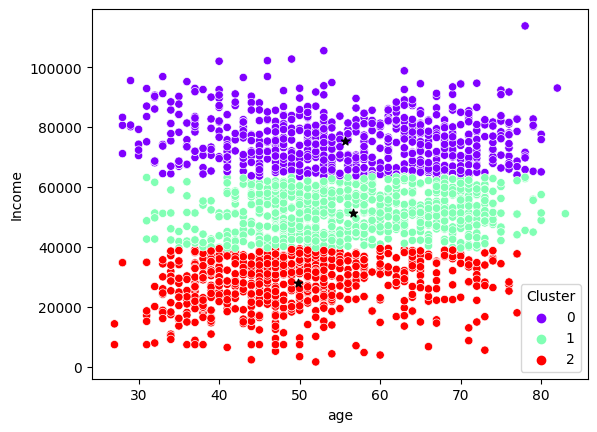

In [ ]:
sns.scatterplot(data=df,y="Income",x="age",hue='Cluster',palette='rainbow')

# Plotting centroids
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='*',color='black')


In [ ]:
#Calculating silhouette_score

from sklearn.metrics import silhouette_score
silhouette_score(X,km1.fit_predict(X))

0.5533443441534398

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

Chart-1 & 2

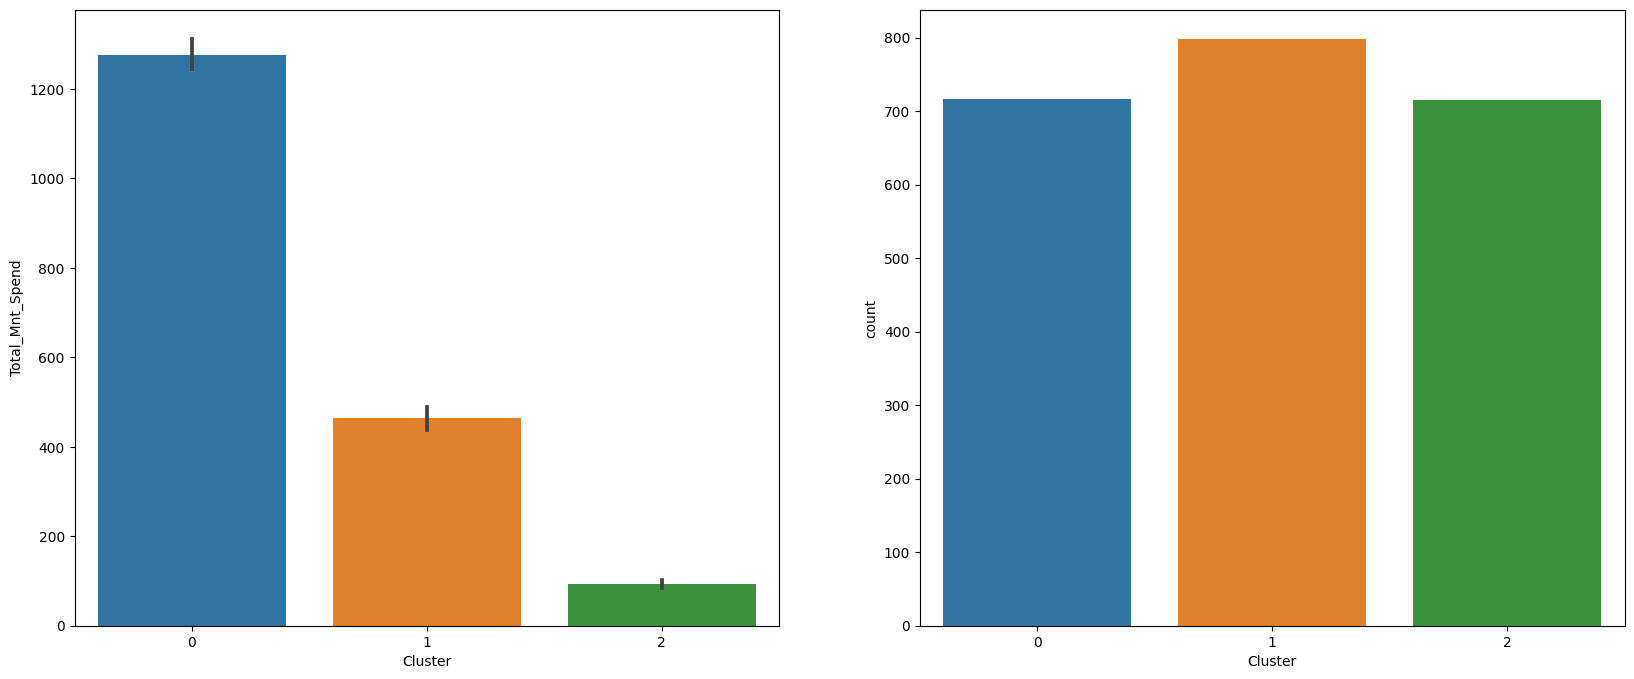

In [ ]:

# Which cluster's Avg Monthly spending is the highest?

fig,axes=plt.subplots(1,2,figsize=(20, 8))
sns.barplot(data=df,x='Cluster',y='Total_Mnt_Spend',ax=axes[0])
plt.ylabel('Avg Monthly spending')

sns.countplot(data=df,x='Cluster',ax=axes[1])

plt.show()

Observation

1. Avg Monthly spending  of cluster 0 is the highest implying maximum revenue comes from cluster 0

2. Customer base of Cluster 1 is the highest

Recomm

1. Need to focus more on Cluster 0



Chart-3& 4

<Axes: >

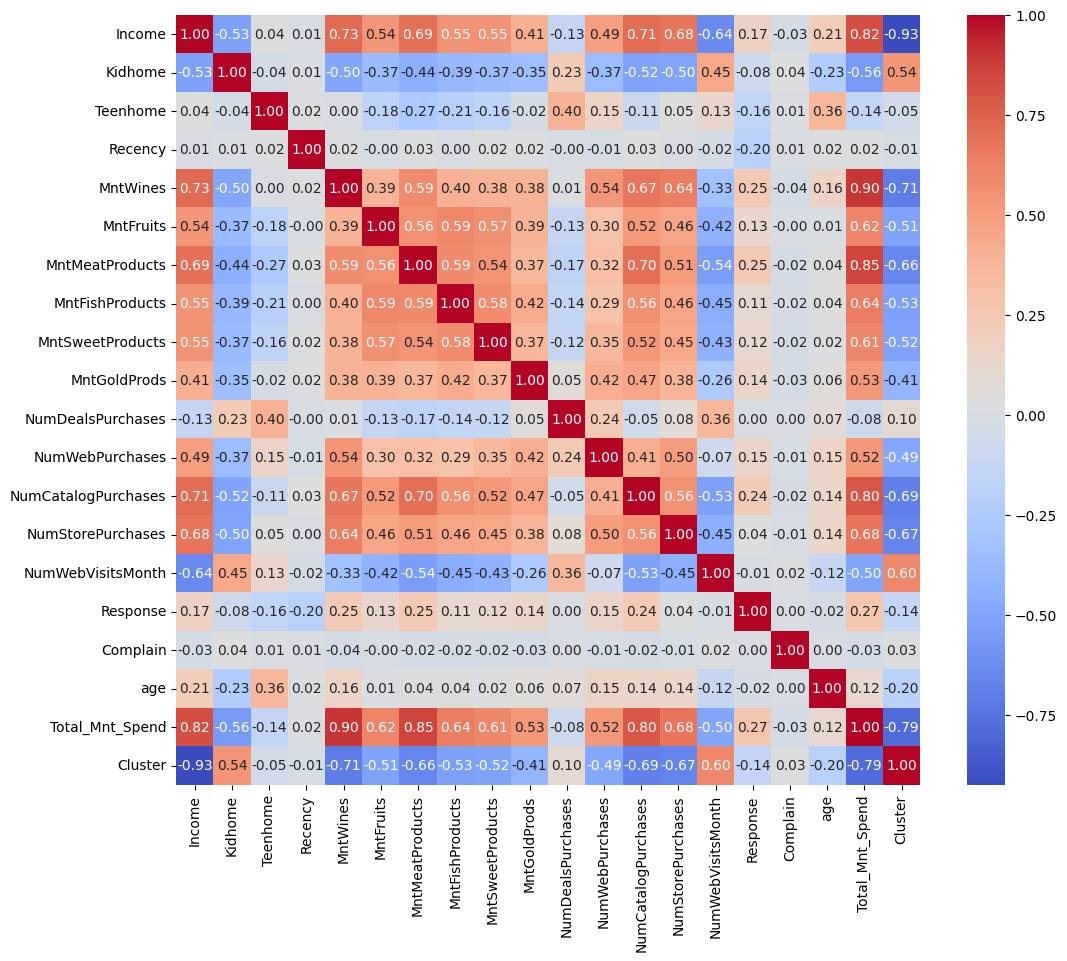

In [ ]:
# Heatmap
plt.figure(figsize=(12,10))
correlation_matrix=df.corr()
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")

In [ ]:
# Fetching col & their correlations having corr greater than the threshold
corr_threshold_positive=0.4
corr_threshold_neg=-0.4

for col in correlation_matrix.columns:

    print(f'"{col}" has POSITIVE correlation of greater than {corr_threshold_positive} with the below columns--')
    print('\n')
    print(correlation_matrix[(correlation_matrix[col]>=corr_threshold_positive)&(correlation_matrix[col]!=1)][col])

    print('\n')
    print(f'"{col}" has Negative correlation of less than {corr_threshold_neg} with the below columns--')
    print(correlation_matrix[(correlation_matrix[col]<=corr_threshold_neg)&(correlation_matrix[col]!=1)][col])

    print('-'*80)

"Income" has POSITIVE correlation of greater than 0.4 with the below columns--


MntWines               0.728169
MntFruits              0.535305
MntMeatProducts        0.693762
MntFishProducts        0.550047
MntSweetProducts       0.549804
MntGoldProds           0.412553
NumWebPurchases        0.493610
NumCatalogPurchases    0.706885
NumStorePurchases      0.683460
Total_Mnt_Spend        0.820222
Name: Income, dtype: float64


"Income" has Negative correlation of less than -0.4 with the below columns--
Kidhome             -0.527402
NumWebVisitsMonth   -0.644405
Cluster             -0.925249
Name: Income, dtype: float64
--------------------------------------------------------------------------------
"Kidhome" has POSITIVE correlation of greater than 0.4 with the below columns--


NumWebVisitsMonth    0.448826
Cluster              0.535931
Name: Kidhome, dtype: float64


"Kidhome" has Negative correlation of less than -0.4 with the below columns--
Income                -0.527402
MntWine

**Observations & Recommendations**

1. High correlation of Income with Mnt_spends. From below regplot we can see ,as Income increases Total_Mnth_Spend also increases.

2. **Cross selling opportunities**
	1. High corr 0.59 bw Mnt_Meat  with Mnth_wine
	2. High corr 0.59 bw Mnt_Meat  with Mnth_Fish

3. Neg corr of kid_home with Mnt_wines ,Mnt_meat products ,num_store_purchases


4. Mnth Fruits negative corr with Num_web_visits implying people prefer to visit stores to buy fresh fruits

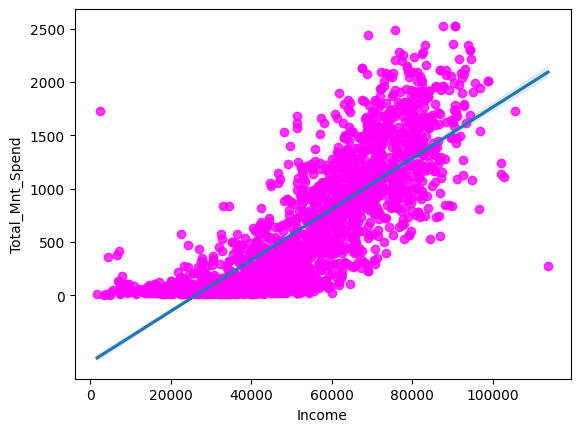

In [ ]:
# Income vs Tot_Mnt_Spends trend

sns.regplot(data=df,x='Income',y='Total_Mnt_Spend',scatter_kws={'color':'magenta'})
plt.yticks(np.arange(0,2501,500))
plt.show()

Chart-5

<Axes: >

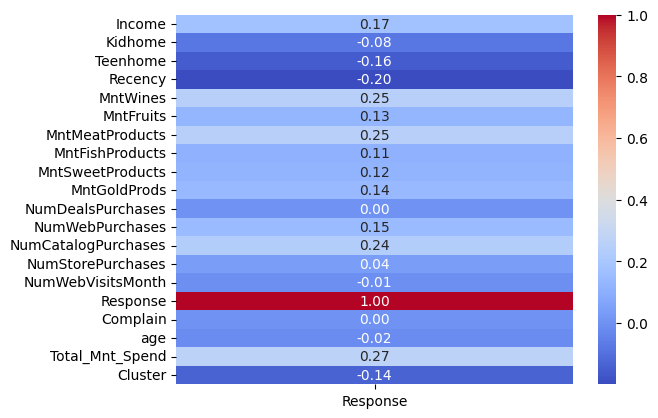

In [ ]:
# Response correlation
correlations_with_Response = correlation_matrix['Response']
sns.heatmap(pd.DataFrame(correlations_with_Response), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
''' Obs & Recommendations

1. Response has negative correlation with Recency

	1. Higher the Recency value that is longer the customer away from the store
  less are the chances he will accept the scheme

  2.Neg corr with teen_home, kid_home--Maybe they are too busy

2. Response has positive correlation of greater than 0.2 with
  1.Mnt_wines
  2.Mnt_meat
  3.catalogue purchase

  Those customers who are buying above products and accepting the catalogues ,there
  is a high chance that they will accept the scheme'''

' Obs & Recommendations\n\n1. Response has negative correlation with Recency\n\n\t1. Higher the Recency value that is longer the customer away from the store\n  less are the chances he will accept the scheme\n\n  2.Neg corr with teen_home, kid_home--Maybe they are too busy\n\n2. Response has positive correlation of greater than 0.2 with\n  1.Mnt_wines\n  2.Mnt_meat\n  3.catalogue purchase\n\n  Those customers who are buying above products and accepting the catalogues ,there\n  is a high chance that they will accept the scheme'

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

Link to the video explanation

https://drive.google.com/file/d/1qXxcUZfdahX6BjU9xaXkmja5T_eW2sUd/view?usp=sharing

